### 12/9/2024 - Simple math behind blurring images

Source: [Medium](https://medium.com/puzzle-sphere/math-behind-image-blur-instagram-snapchat-gaussian-function-quantum-mechanics-convolution-kernel-average-45757b744e83)

#### Guassian Blur: From Quantum mechanics to Image processing

- Guassian Blur is a Probability distribution function.
- Averaging the pixel values of the image.

How does the software decide which pixels to blend together and in what way and by how much?
It is called: Convolution


Convolution: The core of the blur effect
- each pixel information (pixel value) is first gathered from its neighbouring pixels and then, that pixel is modified according to some formula that incorporates that neighbouring information.

Ex: consider a matrix as image, take a 9*9 matrix and divide each pixel value by the average of all the value.
That's it now its blurred image.

[Test the above method]




Original 12x12 Matrix:
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0  30.0 255.0 255.0 255.0  30.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0  30.0 255.0 255.0  30.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0  30.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0  50.0
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0

Blurred 12x12 Matrix:
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0  87.5 125.0 

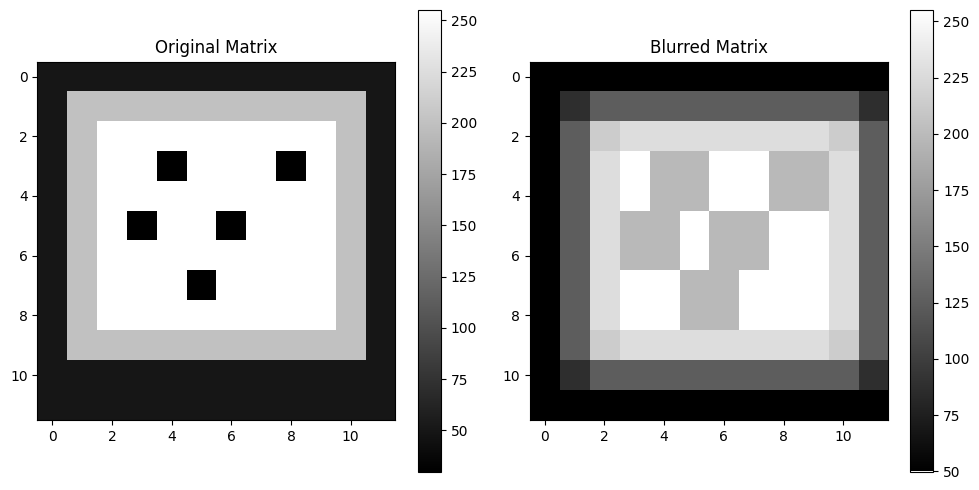

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(matrix, title):
    """Utility function to print a matrix with a title."""
    print(title)
    for row in matrix:
        print(" ".join(f"{val:5.1f}" for val in row))
    print()

def blur_matrix(matrix):
    """Apply blur effect by averaging neighboring pixel values."""
    rows, cols = matrix.shape
    blurred = np.zeros_like(matrix, dtype=float)

    for i in range(rows):
        for j in range(cols):
            # Collect neighbors including the pixel itself
            neighbors = [
                matrix[x, y]
                for x in range(max(0, i - 1), min(rows, i + 1))
                for y in range(max(0, j - 1), min(cols, j + 1))
            ]
            blurred[i, j] = sum(neighbors) / len(neighbors)

    return blurred

# Define a 12x12 matrix with random pixel values (0 to 255)
# np.random.seed(42)  # For reproducibility
# matrix = np.random.randint(0, 256, (12, 12))

array = [
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],  # Rind (outer edge)
 [50, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 50],  # White rind
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 255, 30, 255, 255, 255, 30, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 30, 255, 255, 30, 255, 255, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 255, 255, 30, 255, 255, 255, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 50],  # White rind
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],  # Rind (outer edge)
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]   # Rind (outer edge)
]

# Convert to NumPy array for visualization
matrix = np.array(array)


# Print the original matrix
print_matrix(matrix, "Original 12x12 Matrix:")

# Apply the blur effect
blurred_matrix = blur_matrix(matrix)

# Print the blurred matrix
print_matrix(blurred_matrix, "Blurred 12x12 Matrix:")

# Display the matrices as images
plt.figure(figsize=(10, 5))

# Original matrix
plt.subplot(1, 2, 1)
plt.title("Original Matrix")
plt.imshow(matrix, interpolation="none", cmap='grey')
plt.colorbar()

# Blurred matrix
plt.subplot(1, 2, 2)
plt.title("Blurred Matrix")
plt.imshow(blurred_matrix, interpolation="none", cmap='grey')
plt.colorbar()

plt.tight_layout()
plt.show()

*Kernel (or filter):* is the filter aka small matrix of size 3*3
- The larger the kernel, the more neighbours are considered and the blurrier the result.
*Pixel Averaging:* each pixel in the image was replaced by the weighted sum of its neighbouring pixels

<br>
The Gaussian Blur: A special kind of smoothing <br>
Instead of just averaging the neighbouring pixels equally, the gaussian blur weights the pixels based on their distance from the center of the kernel <br>
Giving more importance to nearby pixels and less to the far ones.

<br>

Gσ = (1/ 2πσ²) e ^ (x²+y²/ 2σ²) 
<br>
- X and Y are the distances from the center pixel.
- σ controls the width of the bell curve. it controls how much blur is applied. Larger it is stronger blur.
<br>

*What is its advantage over equal averaging?*
Gaussian blur provides a more natural looking blur and mimics how we actually perceive soft focus in real life.
It smoothens the transition between sharp and blurred regions more accurately.

#### Other Applications
* In photography, blurring helps draw focus to subjects by reducing distractions in the background.
* In computer vision, blur is used to smoothen the noise and prepare our images for further analysis like running an edge detection algorithm.
* In video games and CGI, gaussian blur is used to create depth-of-field effect which makes everything look more real. (Motion blur).
* Cryptopgraphy and data privacy. Technique like differential privacy use mathematical noise (a form of blur) to obscure data and protect the privacy of users.

***


### 1/1/2025 - Why is it better to report standard deviation than Variance

Source: [Medium](https://tracyrenee61.medium.com/statistics-interview-question-why-is-it-better-to-report-standard-deviation-than-variance-c2c2259d5f24)

##### Standard deviation is expressed in the same units of data.
If your data is price in dollars, your stdev is in dollars. If you use variance, it's in dollars squared. What the heck is a square dollar? It has no physical meaning, unlike square meters for example.

Ease of Communication:

Since the standard deviation reflects the average spread of the data around the mean in the same units, it is more intuitive for non-statistical audiences.
Variance requires an additional mental step to relate it back to the original data.

Compatibility with Normal Distribution:

In a normal distribution, standard deviation has a straightforward interpretation (e.g., ~68% of data lies within ±1 SD, ~95% within ±2 SD).
Variance does not have this intuitive interpretability. 

In summary, while variance is a mathematically important concept (e.g., used in formulas and statistical models), standard deviation is more practical and interpretable for reporting and understanding data variability.

***

### 1/2/2025 - GPT - o1 usage

Source: [LinkedIn](https://www.linkedin.com/posts/eric-vyacheslav-156273169_you-are-using-o1-wrong-lets-establish-some-activity-7271524034733842432-t4Mf/?utm_source=share&utm_medium=member_android)

o1-preview is a general purpose model.
o1-mini specializes in Science, Technology, Engineering, Math

How are they different from 4o?
4o
When you ask it to create the app, it cannot break down the problem into small pieces, make sure the individual parts work and weave everything together. If you know how pre-trained transformers work, you will get my point.

Why o1?
After GPT-4 was released someone clever came up with a new way to get GPT-4 to think step by step in the hopes that it would mimic how humans think about the problem. This was called Chain-Of-Thought where you break down the problems and then solve it. The results were promising

***




### 1/3/2025 - PyMuPDF4LLM for Extracting data from PDFs

Source: [Medium](https://medium.com/@shravankoninti/pymupdf4llm-is-all-you-need-for-extracting-data-from-pdfs-8cfad33bdfaf#:~:text=This%20package%20converts%20the%20pages,to%20GitHub%2Dcompatible%20Markdown%20text.)

Versatile markdown extraction
flexibility in application
comprehensive extraction

In [ ]:
!pip install pymupdf4llm
!pip install llama_index

import pymupdf4llm as pdf
import pathlib

# Extract pdf content as markdown
# md_text = pdf.to_markdown('input.pdf')
# print(md_text[:50])
# Extract only pages 2 and 3
md_text = pdf.to_markdown('input.pdf', pages=[2,3])
print(md_text[:50])
# save
pathlib.Path('output.md').write_bytes(md_text.encode())
# Llama index
llama_reader = pdf.LlamaMarkdownReader()
llama_docs = llama_reader.load_data('input.pdf')
llama_docs[0].text
# Extracting images
md_text_images = pdf.to_markdown(
    doc = 'input.pdf',
    pages = [2,3],
    page_chunks=True,
    write_images = True,
    image_path = 'images',
    image_format = 'jpg',
    dpi = 200
)
print(md_text_images[1]['images'])
# meta data
md_text_chunks = pdf.to_markdown(doc = 'input.pdf', pages = [0, 1, 2], page_chunks=True)
print(md_text_chunks)
# word by word extraction
md_text_words = pdf.to_markdown(doc='input.pdf',
                                pages=[1,2, 3, 4],
                                page_chunks = True,
                                write_images = True,
                                image_path = 'images1', 
                                image_format='jpg',
                                dpi=200,
                                extract_words = True)
print(md_text_words[1]['words'][:5])

import json
# Extract tables
md_text_tables = pdf.to_markdown(doc = 'input.pdf', pages = [9])
print(md_text_tables)

***

### 1/4/2025 - AI Agents vs Agentic AI: What’s the Difference and Why Does It Matter?

Source: [Medium](https://medium.com/@elisowski/ai-agents-vs-agentic-ai-whats-the-difference-and-why-does-it-matter-03159ee8c2b4)

What is Agentic AI?

At its core, Agentic AI is a type of AI that’s all about autonomy. This means that it can make decisions, take actions, and even learn on its own to achieve specific goals. It’s kind of like having a virtual assistant that can think, reason, and adapt to changing circumstances without needing constant direction

- Perception: It gathers data from the world around it.
- Reasoning: It processes this data to understand what’s going on.
- Action: It decides what to do based on its understanding.
- Learning: It improves and adapts over time, learning from feedback and experience.

What is an AI Agent?

On the other hand, AI Agents are typically built to do specific tasks. They’re designed to help you with something — like answering questions, organizing your calendar, or even managing your email inbox. AI Agents are great at automating simple, repetitive tasks but don’t have the autonomy or decision-making abilities that Agentic AI does. Think of them as virtual helpers that do exactly what you tell them to do, without thinking for themselves.



|Agentic AI| AI Agent|
|-----|-----|
|Goal oriented|Task oriented|
|Continuous learn| may not learn or only learns from set of instructions and context|
|Handle complex| handle simple and structured|
|Actively adapts to surrowndings and changes| react to set inputs and doesn't adapt|

Agentic AI in Action
- self driving cars
- Supply Chain Management
- Cybersecurity
- Healthcare

AI Agents in Action
- Customer Support
- Personal Assistants
- Email Management
- Productivity Tools

---

### 1/5/2025 - Datascience skills

Source: [Medium](https://medium.com/towards-data-science/top-12-skills-data-scientists-need-to-succeed-in-2025-c80f54cf227a)

1. Communication skills
 - explain tech stuff
 - storytelling
 - communicate with stakeholders
 - communication in writing
 - avoiding pitfalls (think before you talk)
2. Programming (python)
 - dataclass
3. Deep understanding of data
 - validation , understanding, eda, understand the effects
4. software engineering best practices
- git, clean code, testing, oop, containerization
5. Interacting with databases
- relational databases, nosql, data pipeline, datalakes etc
6. cloud computing
7. master ml frameworks
 - huggingface, fastai
8. mlops
 - wandb, mlflow, clearml, neptune
9. understanding metrics
 - accuracy, f1, precision etc
10. problem solving and critical thinking
11. ai based tools and workflows
12. adaptability and continuous learning

***

### 1/6/2025 - ML Road map 2025

Source: [Markdown](https://pub.towardsai.net/how-id-learn-ml-in-2025-if-i-could-start-over-5e83cefdb2aa)

Python

Math
 - Derivatives and integral
 - vectors and matrices
 - probability theory (Bayes rule)
 - log rules, summation rules
 - Book Recomm: Why Machines Learn: The Elegant Math Behind Modern AI

Machine Learning
 - Andrew Ng's Machine learning specialization

Deep learning
 - Andrew Ng's Deep Learning specialization
 - standord's cs25 series
 - Andrej karpathy's youtube videos
 - https://udlbook.github.io/udlbook/ (Understanding Deep learning)

kaggle simple competition

Implement paper in coding

write paper in arxiv

***

### 1/7/2025 - is AI progress slowing down?

Source: [Medium](https://levelup.gitconnected.com/is-ai-progress-slowing-down-69d4f1215e49)

Model scaling is hitting a wall
use of synthetic training data has been successful, such as alphago which beat the go world champion in 2016, or when alpha zero and alphaproof learned to play games and solve geometry problems by training purely on self-generated data.

we see headlines that AI performs better than phD students on math and physics tests, but at the same time it fails on simple tests that small children easily pass. If AI can't generalize beyond their training data, adding more data eventually stops making a difference.

Power constraints is major

- systems become agentic
- systems will reason and understand
- systems will be self-aware

o1 model is a sneak-preview of what is to come: letting the AI think and reason for a while before generating an answer. However once we have reasoning skills, proper agents, and less hallucinations, achieving artificial general intelligence or even superintelligence is no longer unthinkable.

Current AI can't reason at all (though it does a good job at making it look like it does)

***

### 1/8/2025 - Pydantic AI

Source: [Medium](https://medium.com/google-cloud/how-i-built-an-agent-with-pydantic-ai-and-google-gemini-4887e5dd041d)

Pydantic AI is a Python framework developed by the creators of Pydantic, designed to simplify the construction of type-safe AI agents. It enables developers to define structured outputs for language model interactions, ensuring predictable and reliable AI behavior. Key features include support for multiple language model providers, integration with FastAPI for building high-performance APIs, and tools for real-time data integration. By leveraging Pydantic's data validation capabilities, Pydantic AI enhances type safety and reduces development complexity in AI applications.

***

### 1/9/2025 - Key takeaways and application of top 10 AI research papers of 2024

Source: [Medium](https://pub.towardsai.net/the-top-10-ai-research-papers-of-2024-key-takeaways-and-how-you-can-apply-them-5cec1583f60a)

1. Vision Mamba
The paper showcases how these models handle temporal and spatial dependencies in video and image data more efficiently, making them ideal for low-latency applications
Improved speed and memory efficiency compared to transformers.

- Robotics and AR/VR Systems: Use Vision Mamba’s lightweight architecture to build real-time vision systems.
- Multi-Modal Applications: Combine with NLP models to create AI assistants that interpret both text and images.
- Edge Computing: Deploy on devices with limited computational resources, like drones or smart glasses.

2. Kolmogorov Arnold Networks (KAN)
(KAN) propose a new way of representing and processing data, challenging traditional deep neural networks. By leveraging kernel methods and differential equations, KAN achieves scalability and robustness, particularly in tasks requiring high interpretability or dynamic adaptability.

- Unique combination of kernel methods with deep learning principles.
- Efficient handling of non-linear relationships.
- Application to a broad range of tasks, including physics-based simulations and temporal data analysis.
- Time Series Analysis: Apply KAN to financial forecasting or climate modeling, where complex temporal patterns are present.
- Scientific Research: Use for simulation-heavy fields like molecular dynamics or astrophysics.
- Real-Time Analytics: Implement for fraud detection or anomaly recognition in streams of data

3. GEMMA Models
Summary: GEMMA Models focus on integrating safety and fairness into AI systems without compromising their performance. By introducing novel training techniques and robust evaluation methods, the paper emphasizes reducing bias, enhancing robustness, and improving generalization capabilities in AI models.

- Frameworks for fairness in multi-modal AI.
- Techniques for adversarial robustness.
- Metrics and benchmarks for safety-focused evaluation.
Using GEMMA, you can ensure the AI evaluates candidates equally, regardless of gender, ethnicity, or accents, making the hiring process fairer. For instance, if it detects potential bias in how resumes are ranked, the model can adjust its decision-making criteria dynamically.

4. Qwen 2 Model Series
Qwen 2, developed by Alibaba, offers a modular and scalable architecture optimized for multi-modal tasks. It integrates text, image, and code generation capabilities with advanced mixture-of-expert techniques, enabling seamless processing of diverse data formats.

- State-of-the-art performance in multi-modal benchmarks.
- Modular design for scalability and efficiency.
- Specialization in cross-modal reasoning tasks.


5. Mixture of Experts (MixR A7B)
MixR A7B presents an advanced modular architecture with “mixture-of-expert” techniques, allowing it to allocate computational resources dynamically based on the task at hand

- Modular AI for personalized task performance.
- Scalable architecture for large-scale deployments.
- Dynamic resource allocation for computational efficiency.

6. Gemini 1.5
Gemini 1.5 is Google’s response to the increasing demand for long-context processing in NLP. It introduces a 10-million-token context length, making it ideal for analyzing large documents, such as books or legal texts, with unparalleled efficiency and speed.

7. Enhanced In-Context Learning
This paper introduces novel advancements in in-context learning, enabling models to better understand user-provided examples and adapt responses dynamically. The paper focuses on fine-tuning techniques that allow for personalized AI assistants that deliver tailored outputs based on context and history.

8. Mistral-7B Instruct
Mistral-7B Instruct is a fine-tuned large language model (LLM) with only 7 billion parameters but performance comparable to much larger models. It focuses on instruction-following tasks, making it lightweight yet powerful for practical applications.

9. Orca LLM: Reasoning with Examples
Summary: Orca LLM focuses on improving reasoning capabilities by training on a novel dataset of example-based reasoning tasks. It bridges the gap between generalist LLMs and specialized reasoning engines, enhancing its ability to solve complex logical problems.

10. CLAW-LM: Context Learning Across Windows
Summary: CLAW-LM introduces a novel approach to handling fragmented contexts in NLP tasks. The model excels in processing context spread across multiple windows, enabling it to maintain a consistent understanding of segmented information.

***

### 1/10/2025 - Google veo-2 vs OpenAI and Sora

Source: [Medium](https://medium.com/coding-beauty/new-google-veo-2-cb7339625bb5)

Veo 2 can produce video sin stunning 4k resolution(follows the prompts far more accurately than sora)
sora can only produce in 1080p

With veo 2 you can even specify camera angles, lens types and cinematic effects to achieve the exact aesthetic you need.

veo 2 is already giving us up to 2 minutes video yet sora can't even go past 20 seconds.

***



### 1/11/2025 - Top 7 AI Certifications

Source: [Medium](https://medium.com/ai-in-plain-english/top-7-ai-certifications-to-land-high-paying-jobs-in-2025-ff2a60f3a6bb)

1. IBM AI Engineering Professional Certificate ./
2. Google Cloud's Introduction to Generative AI
3. Microsoft Certified: Azure AI Engineer Associate ./
4. AWS Certified AI Practitioner ./
5. Intel Edge AI Certification
6. NVIDIA Deep Learning Institute Courses ./
7. University of Helsenki's Elements of AI

***


### 1/12/2025 - 𝗟𝗟𝗠 𝗢𝗯𝘀𝗲𝗿𝘃𝗮𝗯𝗶𝗹𝗶𝘁𝘆

Source: [LinkedIn](https://www.linkedin.com/posts/aurimas-griciunas_llm-ai-llmops-activity-7282345747008675840-gd_r?utm_source=share&utm_medium=member_desktop)

𝗟𝗟𝗠 𝗢𝗯𝘀𝗲𝗿𝘃𝗮𝗯𝗶𝗹𝗶𝘁𝘆 is becoming the key foundation without which reliable Agentic systems can not be built. 𝗧𝗿𝗮𝗰𝗶𝗻𝗴 sits at the core of it

𝘼) A Controller in the GenAI system application is the central piece of software that orchestrates the end-to-end process. Think of apps using LangChain, LlamaIndex or Haystack.
𝘽) Trace is the end-to-end application flow from the entry point till the answer is produced, it is composed of smaller pieces called spans.
𝘾) Span is a smaller piece of the application flow that represents an atomic action like a function call or a database query. They can be sequential, or run in parallel.

***





### 1/16/2025 - KAG a better alternative to RAG for Domain specific knowledge applications 

Source: [Medium](https://medium.com/ai-in-plain-english/kag-a-better-alternative-to-rag-for-domain-specific-knowledge-applications-046054bedde1)

RAG struggles with key limitations, especially in professional domains that demand logic, precision, and coherent reasoning.
1. Logical Limitations:
    - often fail to understand logical relationships such as temporal dependencies, numerical operations or causal connections.

Temporal Dependencies
Definition: Temporal dependencies involve the relationships between events or states over time. They are crucial for understanding sequences where the timing or order of events matters.
Example in LLMs:
Sentence: "She woke up, had breakfast, and then left for work."
Temporal dependency: The model should infer that "woke up" occurred before "had breakfast," which occurred before "left for work."

Numerical Operations
Definition: Numerical operations refer to performing mathematical calculations, reasoning about quantities, and comparing numerical values.
Example in LLMs:
Task: "What is the sum of 25 and 37?"
The model needs to compute 
25+37=62.

Causal Connections
Definition: Causal connections refer to identifying and understanding cause-and-effect relationships within a context.
Example in LLMs:
Sentence: "It rained heavily, so the streets were flooded."
Causal connection: The rain caused the flooding.

2. Reduntant and noisy results: 
    - similarity driven retrieval process can result in repetitive,redundant, or irrelevant search.

3. Domain-specific failures
    - professional domains, such as healthcare or finance, require highly accurate and logically structured responses. RAG systems often fall short in these scenarios.



Knowledge Augmented Generation (KAG) emerges as an innovative framework. By seamlessly combining RAG's retrieval mechanisms with the structured logic of knowledge graphs (KGs).

1. LLM-friendly knowledge representation:
- introduce LLMFriSPG Framework that restructures knowledge to align with LLMs capabilities.
    - It uses schema-free and schema-constrained approaches to ensure compatibility with professional grad knowledge
    - If facilitates hierarchical representation, linking raw document text with structured knowledge in the kG.

2. Mutual Indexing for enhanced retrieval
    by creating mutual indexing between the knowledge graph and text chunks.
        - improve context-rich answers by pairing text data with structured relationship.
        - improved handling of multi-hop reasoning tasks.
        Multi-hop reasoning tasks involve answering questions or solving problems that require combining multiple pieces of information (or "hops") from different sources or contexts to arrive at the correct answer

3. Logical form guided reasoning
    - exact match retrieval for pinpoint accuracy.
    - logical reasoning for complex queries.
    - numerical computations to handle data - driven scenarios.

4. Enhance model capabilities in 
    - Natural language Understanding, Inference, and Generation.

Implementation:
1. KAG Builder
    - constructs indexes, extract knowledge.
2. KAG solver
    - process queries through logical form decomposition

Disadvantages:
    1. High computational req due to multiple LLM calls
    2. complex problem decomposition needs
    3. resource intensive processing req

***

